In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('tallas.csv')
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
altura,170,168,163,168,158,160,168,165,160,158,169,158,170,165,161,170,163,160,165,163
peso,64,62,60,63,63,60,66,61,59,59,67,58,63,65,60,68,61,64,62,64
talla,L,L,M,L,M,M,L,L,M,M,L,M,L,L,M,L,M,L,L,L


In [6]:
talla_map = {'L': 1, 'M':0}
data['color'] = data['talla'].map(talla_map)
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
altura,170,168,163,168,158,160,168,165,160,158,169,158,170,165,161,170,163,160,165,163
peso,64,62,60,63,63,60,66,61,59,59,67,58,63,65,60,68,61,64,62,64
talla,L,L,M,L,M,M,L,L,M,M,L,M,L,L,M,L,M,L,L,L
color,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1


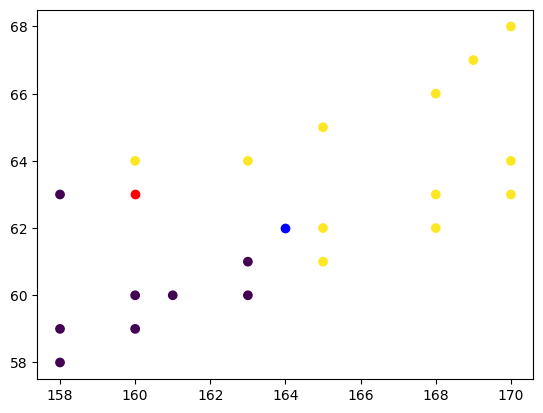

In [11]:
new = pd.DataFrame([[160, 63, None, None]])
new.columns = data.columns
new2 = pd.DataFrame([[164, 62, None, None]])
new2.columns = data.columns
plt.scatter(data['altura'], data['peso'], c=data['color'])
plt.scatter(new['altura'], new['peso'], c='r')
plt.scatter(new2['altura'], new2['peso'], c='b')
plt.show()

In [26]:
def get_closest_points(data, point, k=5):
    data_i = data.iloc[:, 0:2].values
    point_i = point.iloc[:, 0:2].values
    talla = data['talla'].values
    dist = [[i, np.linalg.norm(data_i[i] - point_i), talla[i]] for i in range(len(data_i))]
    dist = pd.DataFrame(dist)
    dist.columns = ['index', 'dist', 'talla']
    return dist.sort_values('dist').head(k)

In [27]:
c = get_closest_points(data, new)
c

,index,dist,talla
17,17,1.000000,L
4,4,2.000000,M
5,5,3.000000,M
14,14,3.162278,M
19,19,3.162278,L


In [32]:
def show_closest_points(data, point, cercanos, color='k'):
    plt.scatter(data['altura'], data['peso'], c=data['color'])
    plt.scatter(point['altura'], point['peso'], c=color)
    for c in cercanos.values:
        p = data.loc[c[0], :]
        plt.plot([point['altura'].values[0], p.altura], [point['peso'].values[0], p.peso])
    plt.show()

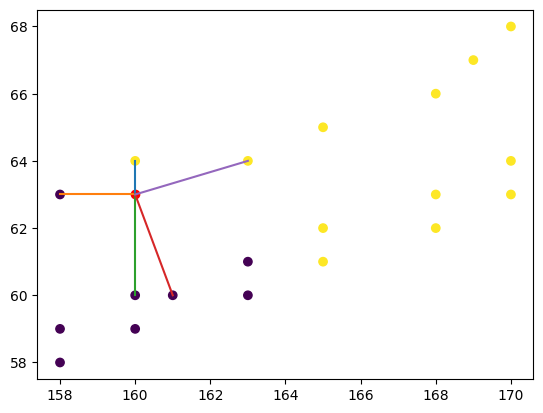

In [33]:
show_closest_points(data, new, c, 'r')

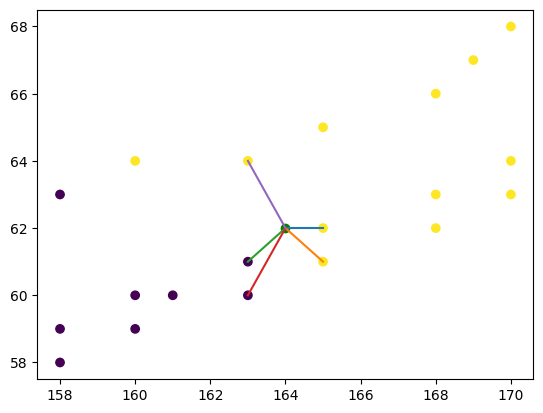

In [34]:
c = get_closest_points(data, new2)
c
show_closest_points(data, new2, c, 'g')